Import Python Modules

In [1]:
import numpy as np 
import pylab as pl 
import networkx as nx
import matplotlib.pyplot as plt

Defining and Visualizing the Graph

C:\Users\Nathan Bastian\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


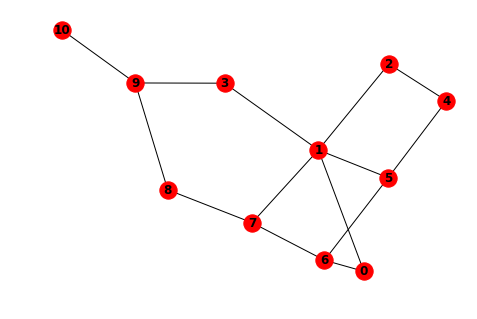

In [2]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),  
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7), 
         (8, 9), (7, 8), (1, 7), (3, 9)] 
  
goal = 10
G = nx.Graph()
G.add_edges_from(edges) 
pos = nx.spring_layout(G) 
nx.draw(G, pos,  with_labels=True, font_weight='bold')
plt.show()

Defining the Reward System for the RL Agent

In [3]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE))) 
M *= -1
  
for point in edges: 
    print(point) 
    if point[1] == goal: 
        M[point] = 100
    else: 
        M[point] = 0
  
    if point[0] == goal: 
        M[point[::-1]] = 100
    else: 
        M[point[::-1]]= 0
        # reverse of point 
  
M[goal, goal]= 100
print(M) 

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


Defining some Utility Functions to be used in the Training

In [4]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE])) 
  
gamma = 0.75
# learning parameter 
initial_state = 1
  
# Determines the available actions for a given state 
def available_actions(state): 
    current_state_row = M[state, ] 
    available_action = np.where(current_state_row >= 0)[1] 
    return available_action 
  
available_action = available_actions(initial_state) 
  
# Chooses one of the available actions at random 
def sample_next_action(available_actions_range): 
    next_action = int(np.random.choice(available_action, 1)) 
    return next_action 
    
action = sample_next_action(available_action) 
  
def update(current_state, action, gamma): 
  
  max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1] 
  if max_index.shape[0] > 1: 
      max_index = int(np.random.choice(max_index, size = 1)) 
  else: 
      max_index = int(max_index) 
  max_value = Q[action, max_index] 
  Q[current_state, action] = M[current_state, action] + gamma * max_value 
  if (np.max(Q) > 0): 
    return(np.sum(Q / np.max(Q)*100)) 
  else: 
    return (0) 

Updates the Q-Matrix According to the Path Chosen

In [5]:
update(initial_state, action, gamma)

0

Training and Evaluating the RL Agent using the Q-Matrix

In [6]:
scores = [] 
for i in range(1000): 
    current_state = np.random.randint(0, int(Q.shape[0])) 
    available_action = available_actions(current_state) 
    action = sample_next_action(available_action) 
    score = update(current_state, action, gamma) 
    scores.append(score)  

print("Trained Q-Matrix:") 
print(Q / np.max(Q)*100) 
  
# Testing 
current_state = 0
steps = [current_state] 
  
while current_state != 10: 
  
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1] 
    if next_step_index.shape[0] > 1: 
        next_step_index = int(np.random.choice(next_step_index, size = 1)) 
    else: 
        next_step_index = int(next_step_index) 
    steps.append(next_step_index) 
    current_state = next_step_index 

Trained Q-Matrix:
[[  0.          42.1867647    0.           0.           0.
    0.          31.64007353   0.           0.           0.
    0.        ]
 [ 31.64007353   0.          31.63959689  56.2490196    0.
   31.63959689   0.          42.1867647    0.           0.
    0.        ]
 [  0.          42.1867647    0.           0.          23.73005515
    0.           0.           0.           0.           0.
    0.        ]
 [  0.          42.1867647    0.           0.           0.
    0.           0.           0.           0.          74.99869281
    0.        ]
 [  0.           0.          31.64007353   0.           0.
   31.63959689   0.           0.           0.           0.
    0.        ]
 [  0.          42.1867647    0.           0.          23.73005515
    0.          31.64007353   0.           0.           0.
    0.        ]
 [ 31.64007353   0.           0.           0.           0.
   31.64007353   0.          42.1867647    0.           0.
    0.        ]
 [  0.          42.1

Output the Most Efficient Path and Rewards Plot

Most efficient path:
[0, 1, 3, 9, 10]


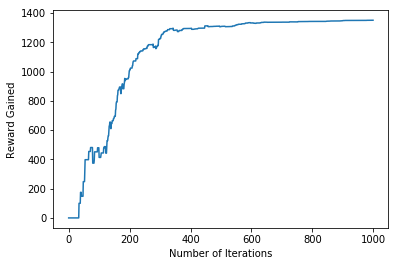

In [7]:
print("Most efficient path:") 
print(steps) 
plt.plot(scores) 
plt.xlabel('Number of Iterations') 
plt.ylabel('Reward Gained') 
plt.show()